In [2]:
from __future__ import absolute_import, division, print_function
import uproot
import numpy as np
import matplotlib.pyplot as plt

# energyflow imports
import energyflow as ef
from energyflow.archs import *
from energyflow.utils import data_split, remap_pids, to_categorical

from sklearn.metrics import roc_auc_score, roc_curve

import sys
sys.path.append("../utils/")
from train_tools import train_qg_pfn

In [3]:
fq_normal = '/home/sambt/pythia83-samples/optimal-classifiers/kernel-1/H2qq-CF3.0CA3.0/total.root'
fq_double_qqg = '/home/sambt/pythia83-samples/optimal-classifiers/kernel-1/H2qq-CFCA3-double-qqg/total.root'
fq_double_qqg_qgq = '/home/sambt/pythia83-samples/optimal-classifiers/kernel-1/H2qq-CFCA3-double-qqg-qgq/total.root'
fg = '/home/sambt/pythia83-samples/optimal-classifiers/kernel-1/H2gg-CF3.0CA3.0/total.root'

out_reg = train_qg_pfn(fq_normal,fg)
out_double_qqg = train_qg_pfn(fq_double_qqg,fg)
out_double_qqg_qgq = train_qg_pfn(fq_double_qqg_qgq,fg)

Finished preprocessing
Done train/val/test split
Model summary:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, None, 3)      0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    400         input[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation_1[0][0]               
_____________________________________________

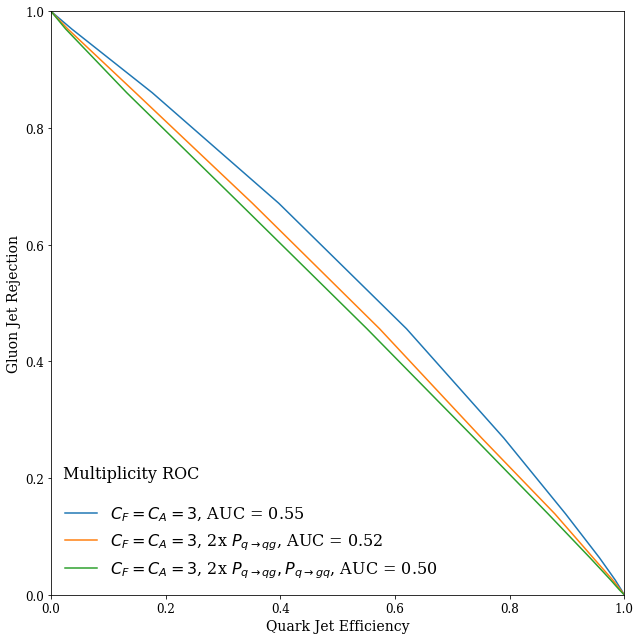

In [29]:
roc_reg = out_reg[3][0]
auc_reg = out_reg[3][1]
fp_reg, tp_reg, thresh_reg = roc_reg

roc_qqg = out_double_qqg[3][0]
auc_qqg = out_double_qqg[3][1]
fp_qqg, tp_qqg, thresh_qqg = roc_qqg

roc_qqg_qgq = out_double_qqg_qgq[3][0]
auc_qqg_qgq = out_double_qqg_qgq[3][1]
fp_qqg_qgq, tp_qqg_qgq, thresh_qqg_qgq = roc_qqg_qgq

#plotting ROC curves
plt.rcParams['figure.figsize'] = (9,9)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.autolayout'] = True

# plot the ROC curves
plt.plot(tp_reg, 1-fp_reg, '-', label=r'$C_F = C_A = 3$, AUC = {0:.2f}'.format(auc_reg))
plt.plot(tp_qqg,1-fp_qqg,'-',label=r'$C_F = C_A = 3$, 2x $P_{{q\rightarrow qg}}$, AUC = {0:.2f}'.format(auc_qqg))
plt.plot(tp_qqg_qgq,1-fp_qqg_qgq,'-',label=r'$C_F = C_A = 3$, 2x $P_{{q\rightarrow qg}}, P_{{q\rightarrow gq}}$, AUC = {0:.2f}'.format(auc_qqg_qgq))

plt.text(0.02,0.2,'Multiplicity ROC',fontsize=16,transform=plt.gca().transAxes)

# axes labels
plt.xlabel('Quark Jet Efficiency',fontsize=14)
plt.ylabel('Gluon Jet Rejection',fontsize=14)

# axes limits
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# make legend and show plot
plt.legend(loc='lower left', frameon=False,fontsize=16)
plt.savefig("Mult_ROCs_CFCA3_make_qg_same.png")
plt.show()

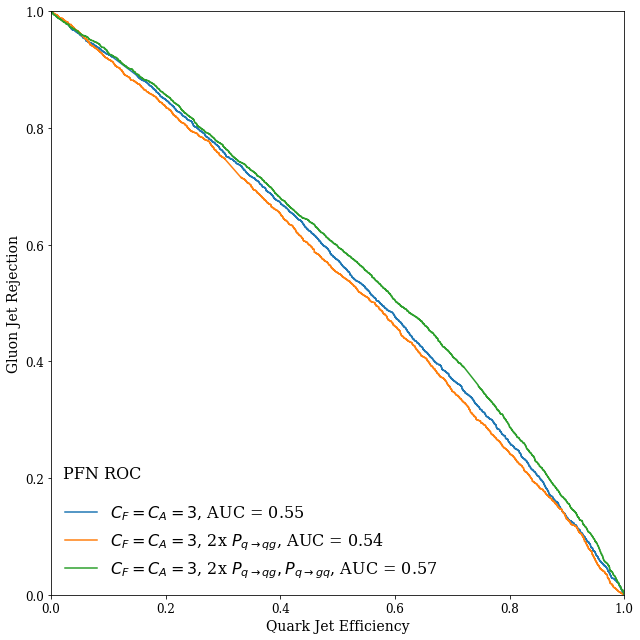

In [28]:
roc_reg = out_reg[1][0]
auc_reg = out_reg[1][1]
fp_reg, tp_reg, thresh_reg = roc_reg

roc_qqg = out_double_qqg[1][0]
auc_qqg = out_double_qqg[1][1]
fp_qqg, tp_qqg, thresh_qqg = roc_qqg

roc_qqg_qgq = out_double_qqg_qgq[1][0]
auc_qqg_qgq = out_double_qqg_qgq[1][1]
fp_qqg_qgq, tp_qqg_qgq, thresh_qqg_qgq = roc_qqg_qgq

#plotting ROC curves
plt.rcParams['figure.figsize'] = (9,9)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.autolayout'] = True

# plot the ROC curves
plt.plot(tp_reg, 1-fp_reg, '-', label=r'$C_F = C_A = 3$, AUC = {0:.2f}'.format(auc_reg))
plt.plot(tp_qqg,1-fp_qqg,'-',label=r'$C_F = C_A = 3$, 2x $P_{{q\rightarrow qg}}$, AUC = {0:.2f}'.format(auc_qqg))
plt.plot(tp_qqg_qgq,1-fp_qqg_qgq,'-',label=r'$C_F = C_A = 3$, 2x $P_{{q\rightarrow qg}}, P_{{q\rightarrow gq}}$, AUC = {0:.2f}'.format(auc_qqg_qgq))

plt.text(0.02,0.2,'PFN ROC',fontsize=16,transform=plt.gca().transAxes)

# axes labels
plt.xlabel('Quark Jet Efficiency',fontsize=14)
plt.ylabel('Gluon Jet Rejection',fontsize=14)

# axes limits
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# make legend and show plot
plt.legend(loc='lower left', frameon=False,fontsize=16)
plt.savefig("PFN_ROCs_CFCA3_make_qg_same.png")
plt.show()

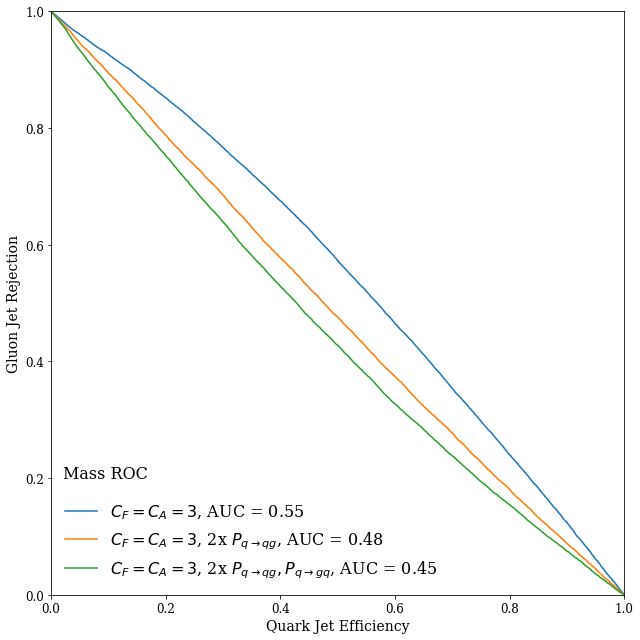

In [31]:
roc_reg = out_reg[2][0]
auc_reg = out_reg[2][1]
fp_reg, tp_reg, thresh_reg = roc_reg

roc_qqg = out_double_qqg[2][0]
auc_qqg = out_double_qqg[2][1]
fp_qqg, tp_qqg, thresh_qqg = roc_qqg

roc_qqg_qgq = out_double_qqg_qgq[2][0]
auc_qqg_qgq = out_double_qqg_qgq[2][1]
fp_qqg_qgq, tp_qqg_qgq, thresh_qqg_qgq = roc_qqg_qgq

#plotting ROC curves
plt.rcParams['figure.figsize'] = (9,9)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.autolayout'] = True

# plot the ROC curves
plt.plot(tp_reg, 1-fp_reg, '-', label=r'$C_F = C_A = 3$, AUC = {0:.2f}'.format(auc_reg))
plt.plot(tp_qqg,1-fp_qqg,'-',label=r'$C_F = C_A = 3$, 2x $P_{{q\rightarrow qg}}$, AUC = {0:.2f}'.format(auc_qqg))
plt.plot(tp_qqg_qgq,1-fp_qqg_qgq,'-',label=r'$C_F = C_A = 3$, 2x $P_{{q\rightarrow qg}}, P_{{q\rightarrow gq}}$, AUC = {0:.2f}'.format(auc_qqg_qgq))

plt.text(0.02,0.2,'Mass ROC',fontsize=16,transform=plt.gca().transAxes)

# axes labels
plt.xlabel('Quark Jet Efficiency',fontsize=14)
plt.ylabel('Gluon Jet Rejection',fontsize=14)

# axes limits
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# make legend and show plot
plt.legend(loc='lower left', frameon=False,fontsize=16)
plt.savefig("Mass_ROCs_CFCA3_make_qg_same.png")
plt.show()

In [32]:
fq_nosplit = '/home/sambt/pythia83-samples/optimal-classifiers/kernel-1/H2qq-CFCA3-no-splitting/total.root'
fg_nosplit = '/home/sambt/pythia83-samples/optimal-classifiers/kernel-1/H2gg-CFCA3-no-splitting/total.root'

out_nosplit = train_qg_pfn(fq_nosplit,fg_nosplit)

Finished preprocessing
Done train/val/test split
Model summary:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, None, 3)      0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    400         input[0][0]                      
__________________________________________________________________________________________________
activation_22 (Activation)      (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation_22[0][0]              
_____________________________________________

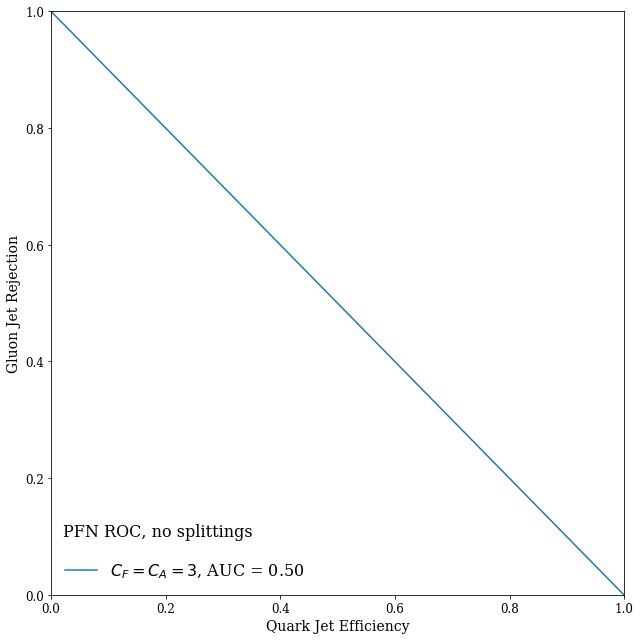

In [46]:
roc_nosplit = out_nosplit[3][0]
auc_nosplit = out_nosplit[3][1]
fp_nosplit, tp_nosplit, thresh_nosplit = roc_nosplit

#plotting ROC curves
plt.rcParams['figure.figsize'] = (9,9)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.autolayout'] = True

# plot the ROC curves
plt.plot(tp_nosplit, 1-fp_nosplit, '-', label=r'$C_F = C_A = 3$, AUC = {0:.2f}'.format(auc_nosplit))

plt.text(0.02,0.1,'PFN ROC, no splittings',fontsize=16,transform=plt.gca().transAxes)

# axes labels
plt.xlabel('Quark Jet Efficiency',fontsize=14)
plt.ylabel('Gluon Jet Rejection',fontsize=14)

# axes limits
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# make legend and show plot
plt.legend(loc='lower left', frameon=False,fontsize=16)
plt.savefig("PFN_ROCs_CFCA3_nosplitting.png")
plt.show()

In [39]:
fq_onlysoft = '/home/sambt/pythia83-samples/optimal-classifiers/kernel-1/H2qq-CFCA3-split-onlysoft/total.root'
fq_onlycoll = '/home/sambt/pythia83-samples/optimal-classifiers/kernel-1/H2qq-CFCA3-split-onlycoll/total.root'
fq_onlyfin = '/home/sambt/pythia83-samples/optimal-classifiers/kernel-1/H2qq-CFCA3-split-onlyfin/total.root'

fg_onlysoft = '/home/sambt/pythia83-samples/optimal-classifiers/kernel-1/H2gg-CFCA3-split-onlysoft/total.root'
fg_onlycoll = '/home/sambt/pythia83-samples/optimal-classifiers/kernel-1/H2gg-CFCA3-split-onlycoll/total.root'
fg_onlyfin = '/home/sambt/pythia83-samples/optimal-classifiers/kernel-1/H2gg-CFCA3-split-onlyfin/total.root'

out_onlysoft = train_qg_pfn(fq_onlysoft,fg_onlysoft)
out_onlycoll = train_qg_pfn(fq_onlycoll,fg_onlycoll)
out_onlyfin = train_qg_pfn(fq_onlyfin,fg_onlyfin)

Finished preprocessing
Done train/val/test split
Model summary:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, None, 3)      0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    400         input[0][0]                      
__________________________________________________________________________________________________
activation_29 (Activation)      (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation_29[0][0]              
_____________________________________________

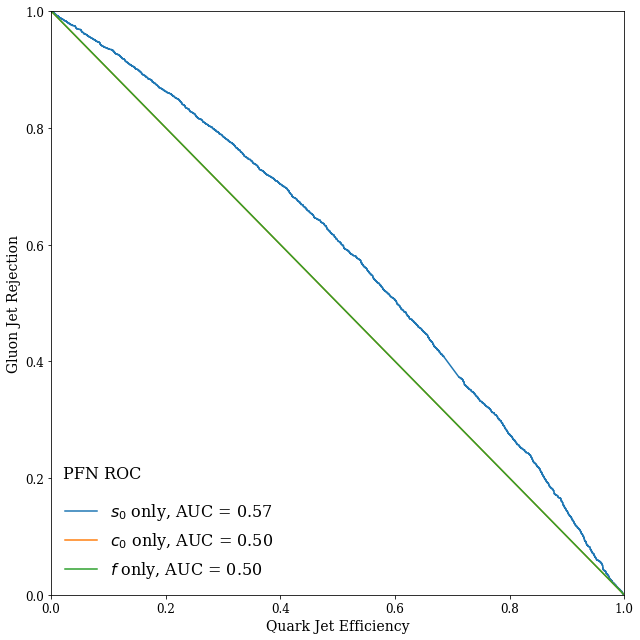

In [41]:
roc_onlysoft = out_onlysoft[1][0]
auc_onlysoft = out_onlysoft[1][1]
fp_onlysoft, tp_onlysoft, thresh_onlysoft = roc_onlysoft

roc_onlycoll = out_onlycoll[1][0]
auc_onlycoll = out_onlycoll[1][1]
fp_onlycoll, tp_onlycoll, thresh_onlycoll = roc_onlycoll

roc_onlyfin = out_onlyfin[1][0]
auc_onlyfin = out_onlyfin[1][1]
fp_onlyfin, tp_onlyfin, thresh_onlyfin = roc_onlyfin

#plotting ROC curves
plt.rcParams['figure.figsize'] = (9,9)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.autolayout'] = True

# plot the ROC curves
plt.plot(tp_onlysoft, 1-fp_onlysoft, '-', label=r'$s_0$ only, AUC = {0:.2f}'.format(auc_onlysoft))
plt.plot(tp_onlycoll, 1-fp_onlycoll, '-', label=r'$c_0$ only, AUC = {0:.2f}'.format(auc_onlycoll))
plt.plot(tp_onlyfin, 1-fp_onlyfin, '-', label=r'$f$ only, AUC = {0:.2f}'.format(auc_onlyfin))

plt.text(0.02,0.2,'PFN ROC',fontsize=16,transform=plt.gca().transAxes)

# axes labels
plt.xlabel('Quark Jet Efficiency',fontsize=14)
plt.ylabel('Gluon Jet Rejection',fontsize=14)

# axes limits
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# make legend and show plot
plt.legend(loc='lower left', frameon=False,fontsize=16)
plt.savefig("PFN_ROCs_split_pieces.png")
plt.show()

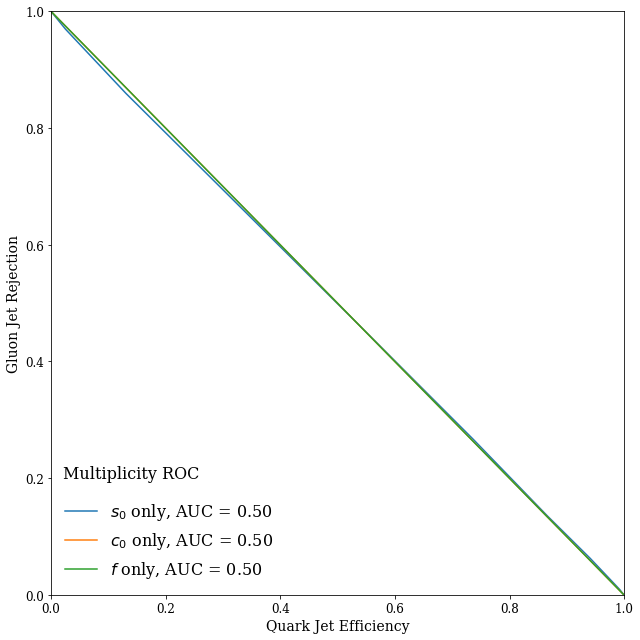

In [43]:
roc_onlysoft = out_onlysoft[3][0]
auc_onlysoft = out_onlysoft[3][1]
fp_onlysoft, tp_onlysoft, thresh_onlysoft = roc_onlysoft

roc_onlycoll = out_onlycoll[3][0]
auc_onlycoll = out_onlycoll[3][1]
fp_onlycoll, tp_onlycoll, thresh_onlycoll = roc_onlycoll

roc_onlyfin = out_onlyfin[3][0]
auc_onlyfin = out_onlyfin[3][1]
fp_onlyfin, tp_onlyfin, thresh_onlyfin = roc_onlyfin

#plotting ROC curves
plt.rcParams['figure.figsize'] = (9,9)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.autolayout'] = True

# plot the ROC curves
plt.plot(tp_onlysoft, 1-fp_onlysoft, '-', label=r'$s_0$ only, AUC = {0:.2f}'.format(auc_onlysoft))
plt.plot(tp_onlycoll, 1-fp_onlycoll, '-', label=r'$c_0$ only, AUC = {0:.2f}'.format(auc_onlycoll))
plt.plot(tp_onlyfin, 1-fp_onlyfin, '-', label=r'$f$ only, AUC = {0:.2f}'.format(auc_onlyfin))

plt.text(0.02,0.2,'Multiplicity ROC',fontsize=16,transform=plt.gca().transAxes)

# axes labels
plt.xlabel('Quark Jet Efficiency',fontsize=14)
plt.ylabel('Gluon Jet Rejection',fontsize=14)

# axes limits
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# make legend and show plot
plt.legend(loc='lower left', frameon=False,fontsize=16)
plt.savefig("Mult_ROCs_split_pieces.png")
plt.show()

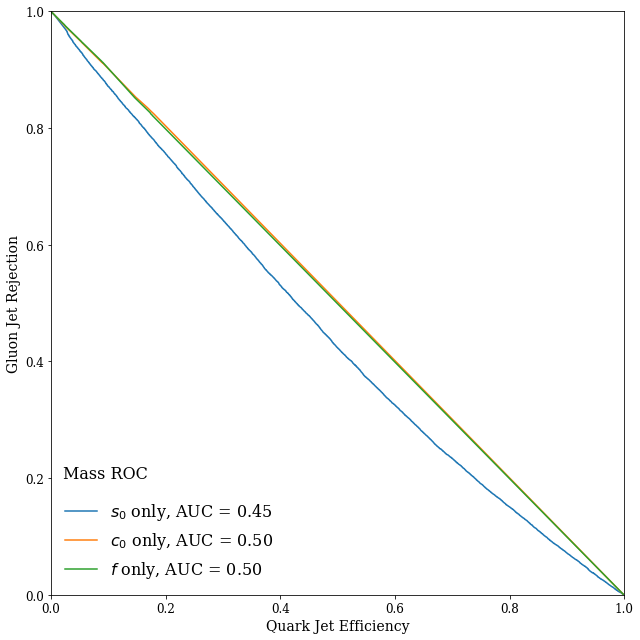

In [47]:
roc_onlysoft = out_onlysoft[2][0]
auc_onlysoft = out_onlysoft[2][1]
fp_onlysoft, tp_onlysoft, thresh_onlysoft = roc_onlysoft

roc_onlycoll = out_onlycoll[2][0]
auc_onlycoll = out_onlycoll[2][1]
fp_onlycoll, tp_onlycoll, thresh_onlycoll = roc_onlycoll

roc_onlyfin = out_onlyfin[2][0]
auc_onlyfin = out_onlyfin[2][1]
fp_onlyfin, tp_onlyfin, thresh_onlyfin = roc_onlyfin

#plotting ROC curves
plt.rcParams['figure.figsize'] = (9,9)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.autolayout'] = True

# plot the ROC curves
plt.plot(tp_onlysoft, 1-fp_onlysoft, '-', label=r'$s_0$ only, AUC = {0:.2f}'.format(auc_onlysoft))
plt.plot(tp_onlycoll, 1-fp_onlycoll, '-', label=r'$c_0$ only, AUC = {0:.2f}'.format(auc_onlycoll))
plt.plot(tp_onlyfin, 1-fp_onlyfin, '-', label=r'$f$ only, AUC = {0:.2f}'.format(auc_onlyfin))

plt.text(0.02,0.2,'Mass ROC',fontsize=16,transform=plt.gca().transAxes)

# axes labels
plt.xlabel('Quark Jet Efficiency',fontsize=14)
plt.ylabel('Gluon Jet Rejection',fontsize=14)

# axes limits
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# make legend and show plot
plt.legend(loc='lower left', frameon=False,fontsize=16)
plt.savefig("Mass_ROCs_split_pieces.png")
plt.show()